In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.font_manager as fm
import matplotlib.patheffects as path_effects   
%matplotlib inline

In [2]:
file = r"C:\Users\ASIA-19\Desktop\화물차사고\최종데이터\통합데이터.xlsx"
df = pd.read_excel(file, sheet_name="Sheet1")

In [3]:
df.head()

,사고번호,사고일시,요일,도로종류,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2019010100100152,2019년 1월 1일 11시,화요일,경부,경상북도 영천시 북안면,경상사고,0,0,1,0,...,맑음,단일로 - 기타,승용,남,38세,상해없음,승용,남,31세,경상
1,2019010300100238,2019년 1월 3일 13시,목요일,경부,충청남도 천안시 서북구 성거읍,경상사고,0,0,2,0,...,맑음,단일로 - 기타,기타불명,기타불명,미분류,기타불명,승용,남,62세,경상
2,2019010400100022,2019년 1월 4일 00시,금요일,경부,경기도 용인시 기흥구 상갈동,경상사고,0,0,2,0,...,맑음,단일로 - 기타,승용,남,55세,상해없음,승용,남,30세,경상
3,2019010500100058,2019년 1월 5일 02시,토요일,경부,경기도 화성시 방교동,중상사고,0,1,0,0,...,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,여,54세,중상
4,2019010500100059,2019년 1월 5일 02시,토요일,경부,경기도 용인시 기흥구 하갈동,경상사고,0,0,1,0,...,맑음,단일로 - 기타,승용,남,56세,상해없음,승용,남,29세,경상


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고번호        12283 non-null  int64 
 1   사고일시        12283 non-null  object
 2   요일          12283 non-null  object
 3   도로종류        12283 non-null  object
 4   시군구         12283 non-null  object
 5   사고내용        12283 non-null  object
 6   사망자수        12283 non-null  int64 
 7   중상자수        12283 non-null  int64 
 8   경상자수        12283 non-null  int64 
 9   부상신고자수      12283 non-null  int64 
 10  부상자수        12283 non-null  int64 
 11  사고유형        12283 non-null  object
 12  법규위반        12283 non-null  object
 13  노면상태        12283 non-null  object
 14  기상상태        12283 non-null  object
 15  도로형태        12283 non-null  object
 16  가해운전자 차종    12283 non-null  object
 17  가해운전자 성별    12283 non-null  object
 18  가해운전자 연령    12283 non-null  object
 19  가해운전자 상해정도  12283 non-null  object
 20  피해운전자 

# 결측치 제거

In [5]:
df.isnull().sum()

사고번호            0
사고일시            0
요일              0
도로종류            0
시군구             0
사고내용            0
사망자수            0
중상자수            0
경상자수            0
부상신고자수          0
부상자수            0
사고유형            0
법규위반            0
노면상태            0
기상상태            0
도로형태            0
가해운전자 차종        0
가해운전자 성별        0
가해운전자 연령        0
가해운전자 상해정도      0
피해운전자 차종      382
피해운전자 성별      383
피해운전자 연령      382
피해운전자 상해정도    383
dtype: int64

In [6]:
from collections import Counter as cc
cnt = cc(df['피해운전자 차종'])
cnt.most_common()[:15]

[('승용', 8735),
 ('화물', 2187),
 ('승합', 409),
 (nan, 382),
 ('특수', 290),
 ('보행자', 154),
 ('건설기계', 103),
 ('기타불명', 21),
 ('미분류', 1),
 ('원동기', 1)]

In [7]:
# nan값과 미분류를 기타불명으로 대체(단독사고차량)
df['피해운전자 차종'] = df['피해운전자 차종'].fillna(value = '기타불명')
df['피해운전자 차종'].replace(['미분류'],['기타불명'],inplace=True)

In [8]:
from collections import Counter as cc
cnt = cc(df['피해운전자 성별'])
cnt.most_common()[:5]

[('남', 9388), ('여', 2479), (nan, 383), ('기타불명', 33)]

In [9]:
# nan값 기타불명으로 대체(단독사고차량)
df['피해운전자 성별'] = df['피해운전자 성별'].fillna(value = '기타불명')

In [10]:
from collections import Counter as cc
cnt = cc(df['피해운전자 연령'])
cnt.most_common()[:100]

[(nan, 382),
 ('49세', 363),
 ('37세', 333),
 ('50세', 324),
 ('47세', 311),
 ('48세', 309),
 ('38세', 304),
 ('35세', 303),
 ('45세', 299),
 ('54세', 296),
 ('52세', 296),
 ('44세', 293),
 ('40세', 290),
 ('30세', 287),
 ('53세', 286),
 ('51세', 286),
 ('46세', 283),
 ('28세', 283),
 ('39세', 281),
 ('36세', 279),
 ('42세', 272),
 ('43세', 272),
 ('58세', 265),
 ('34세', 265),
 ('29세', 263),
 ('55세', 262),
 ('31세', 261),
 ('41세', 257),
 ('33세', 257),
 ('32세', 256),
 ('60세', 250),
 ('56세', 246),
 ('59세', 244),
 ('57세', 236),
 ('27세', 233),
 ('62세', 227),
 ('61세', 225),
 ('26세', 196),
 ('25세', 174),
 ('63세', 164),
 ('64세', 158),
 ('23세', 127),
 ('24세', 125),
 ('66세', 115),
 ('65세', 109),
 ('67세', 93),
 ('68세', 83),
 ('22세', 79),
 ('21세', 56),
 ('69세', 55),
 ('70세', 49),
 ('71세', 44),
 ('미분류', 37),
 ('20세', 36),
 ('19세', 29),
 ('74세', 28),
 ('72세', 28),
 ('73세', 22),
 ('75세', 19),
 ('76세', 16),
 ('18세', 14),
 ('77세', 13),
 ('78세', 11),
 ('79세', 9),
 ('82세', 3),
 ('81세', 3),
 ('80세', 3),
 ('83세', 2),
 ('15세', 1

In [11]:
# nan값과 미분류, 기타불명를 기타불명으로 대체
df['피해운전자 연령'].replace([None],[44],inplace=True)
df['피해운전자 연령'].replace(['미분류'],[44],inplace=True)
df['피해운전자 연령'].replace(['기타불명'],[44],inplace=True)
df['피해운전자 연령'] = df['피해운전자 연령'].replace({'세': ''}, regex = True).astype(int)
df['피해운전자 연령'].mean()

44.8318814621835

In [12]:
df['피해운전자 연령'].median()

44.0

In [13]:
# nan값 기타불명으로 대체
df['피해운전자 상해정도'] = df['피해운전자 상해정도'].fillna(value = '기타불명')

In [14]:
# nan값 기타불명으로 대체
df['가해운전자 상해정도'] = df['가해운전자 상해정도'].fillna(value = '기타불명')

In [16]:
from collections import Counter as cc
cnt = cc(df['가해운전자 상해정도'])
print('가해운전자 상해정도:\n', cnt.most_common()[:8])
cnt = cc(df['피해운전자 상해정도'])
print('피해운전자 상해정도:\n', cnt.most_common()[:8])

가해운전자 상해정도:
 [('상해없음', 9782), ('경상', 811), ('기타불명', 639), ('중상', 437), ('부상신고', 335), ('사망', 279)]
피해운전자 상해정도:
 [('경상', 8205), ('중상', 1843), ('상해없음', 1137), ('부상신고', 485), ('기타불명', 474), ('사망', 139)]


In [17]:
from collections import Counter as cc
cnt = cc(df['가해운전자 연령'])
cnt.most_common()[:200]

[('미분류', 388),
 ('59세', 343),
 ('60세', 337),
 ('55세', 321),
 ('61세', 317),
 ('58세', 315),
 ('50세', 301),
 ('51세', 297),
 ('56세', 293),
 ('49세', 289),
 ('53세', 289),
 ('52세', 278),
 ('57세', 278),
 ('46세', 270),
 ('48세', 266),
 ('47세', 260),
 ('54세', 257),
 ('27세', 251),
 ('62세', 250),
 ('28세', 243),
 ('26세', 239),
 ('63세', 234),
 ('39세', 233),
 ('40세', 231),
 ('29세', 227),
 ('44세', 227),
 ('38세', 223),
 ('37세', 221),
 ('31세', 219),
 ('64세', 217),
 ('43세', 215),
 ('25세', 212),
 ('42세', 212),
 ('41세', 211),
 ('30세', 210),
 ('45세', 208),
 ('33세', 206),
 ('35세', 201),
 ('36세', 200),
 ('34세', 198),
 ('32세', 185),
 ('65세', 183),
 ('24세', 158),
 ('22세', 157),
 ('23세', 151),
 ('66세', 149),
 ('67세', 135),
 ('68세', 118),
 ('21세', 114),
 ('20세', 89),
 ('69세', 88),
 ('19세', 73),
 ('71세', 72),
 ('72세', 69),
 ('70세', 59),
 ('73세', 42),
 ('18세', 42),
 ('74세', 42),
 ('75세', 30),
 ('76세', 23),
 ('78세', 20),
 ('77세', 19),
 ('79세', 14),
 ('81세', 10),
 ('80세', 10),
 ('83세', 9),
 ('82세', 6),
 ('17세', 6),
 (

In [18]:
#
df['가해운전자 연령'].replace(['미분류'],[47],inplace=True)
df['가해운전자 연령'] = df['가해운전자 연령'].replace({'세': '', '이상': ''}, regex = True).astype(int)
df['가해운전자 연령'].mean()

46.38630627696817

In [19]:
df['가해운전자 연령'].median()

47.0

In [20]:
# train_df["AgeBand"] = pd.cut(train_df["Age"], bins = 5, labels = [0, 1, 2, 3, 4, 5])

df.loc[                               (df['가해운전자 연령'] <= 19), "가해연령대"] = 10
df.loc[(df['가해운전자 연령'] > 19) & (df['가해운전자 연령'] <= 29), "가해연령대"] = 20
df.loc[(df['가해운전자 연령'] > 29) & (df['가해운전자 연령'] <= 39), "가해연령대"] = 30
df.loc[(df['가해운전자 연령'] > 39) & (df['가해운전자 연령'] <= 49), "가해연령대"] = 40
df.loc[(df['가해운전자 연령'] > 49) & (df['가해운전자 연령'] <= 59), "가해연령대"] = 50
df.loc[(df['가해운전자 연령'] > 59) & (df['가해운전자 연령'] <= 69), "가해연령대"] = 60
df.loc[(df['가해운전자 연령'] > 69) & (df['가해운전자 연령'] <= 79), "가해연령대"] = 70
df.loc[(df['가해운전자 연령'] > 79)                                , "가해연령대"] = 80
plt.show()

In [22]:
# 시리즈를 데이터 프레임으로 전환하여 문자열 분리
df['시군구'] = df['시군구'].astype('str')
df1 = pd.DataFrame(df['시군구'].str.split().tolist(), columns = 'a b c d'.split())
df['시군구'] = df1['a']

In [23]:
from collections import Counter as cc
cnt = cc(df['시군구'])
cnt.most_common()[:25]

[('경기도', 5810),
 ('경상남도', 890),
 ('경상북도', 809),
 ('충청남도', 775),
 ('인천광역시', 749),
 ('충청북도', 719),
 ('대구광역시', 430),
 ('강원도', 422),
 ('서울특별시', 398),
 ('전라남도', 316),
 ('전라북도', 278),
 ('부산광역시', 252),
 ('대전광역시', 163),
 ('광주광역시', 155),
 ('울산광역시', 107),
 ('세종특별자치시', 10)]

In [24]:
# 시리즈를 데이터 프레임으로 전환하여 문자열 분리
df['사고일시'] = df['사고일시'].astype('str')
df1 = pd.DataFrame(df['사고일시'].str.split().tolist(), columns = 'a b c d'.split())
df['사고일'] = df1['a']+df1['b']+df1['c']

In [25]:
df['사고일'] = df['사고일'].replace({'년': '-', '월': '-','일': ''}, regex = True)

In [26]:
# 시리즈를 데이터 프레임으로 전환하여 문자열 분리
df['사고시'] = df1['d']

In [27]:
from collections import Counter as cc
cnt = cc(df['사고시'])
cnt.most_common()[:25]

[('17시', 850),
 ('16시', 833),
 ('18시', 830),
 ('15시', 806),
 ('14시', 734),
 ('11시', 699),
 ('13시', 656),
 ('12시', 640),
 ('10시', 632),
 ('19시', 581),
 ('08시', 541),
 ('20시', 519),
 ('09시', 502),
 ('07시', 465),
 ('22시', 427),
 ('21시', 424),
 ('06시', 402),
 ('23시', 346),
 ('00시', 315),
 ('05시', 258),
 ('01시', 249),
 ('04시', 205),
 ('02시', 202),
 ('03시', 167)]

In [28]:
df['사고시'] = df['사고시'].replace({'시': ''}, regex = True).astype(int)

In [29]:
import datetime
df['사고일'] = pd.to_datetime(df['사고일'])
df.head(3)

,사고번호,사고일시,요일,도로종류,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,가해연령대,피해연령대,사고일,사고시
0,2019010100100152,2019년 1월 1일 11시,화요일,경부,경상북도,경상사고,0,0,1,0,...,38,상해없음,승용,남,31,경상,30.0,30.0,2019-01-01,11
1,2019010300100238,2019년 1월 3일 13시,목요일,경부,충청남도,경상사고,0,0,2,0,...,47,기타불명,승용,남,62,경상,40.0,60.0,2019-01-03,13
2,2019010400100022,2019년 1월 4일 00시,금요일,경부,경기도,경상사고,0,0,2,0,...,55,상해없음,승용,남,30,경상,50.0,20.0,2019-01-04,0


In [30]:
df.describe()

,사고번호,사망자수,중상자수,경상자수,부상신고자수,부상자수,가해운전자 연령,피해운전자 연령,가해연령대,피해연령대,사고시
count,1.228300e+04,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000,12283.000000
mean,2.020129e+15,0.046813,0.367825,1.566718,0.180086,2.114630,46.386306,44.831881,41.789465,39.286819,13.087438
std,8.308084e+11,0.238065,0.784257,1.667434,0.809971,2.121888,14.101188,12.547548,14.433524,12.907903,5.839757
min,2.019010e+15,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,5.000000,10.000000,10.000000,0.000000
25%,2.019102e+15,0.000000,0.000000,1.000000,0.000000,1.000000,35.000000,35.000000,30.000000,30.000000,9.000000
50%,2.020082e+15,0.000000,0.000000,1.000000,0.000000,1.000000,47.000000,44.000000,40.000000,40.000000,14.000000
75%,2.021051e+15,0.000000,1.000000,2.000000,0.000000,2.000000,58.000000,54.000000,50.000000,50.000000,18.000000
max,2.021123e+15,7.000000,15.000000,26.000000,47.000000,48.000000,98.000000,95.000000,80.000000,80.000000,23.000000


In [31]:
df.shape

(12283, 28)

In [32]:
# 한글 깨짐 방지
import matplotlib
import matplotlib.font_manager as fm
# fm._rebuild()
fm.get_fontconfig_fonts()
font_location = 'C:/Users/ASIA-19/NanumGothic.ttf' # 폰트 파일 이름, 디렉토리 주의
font_name = fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font', family=font_name)

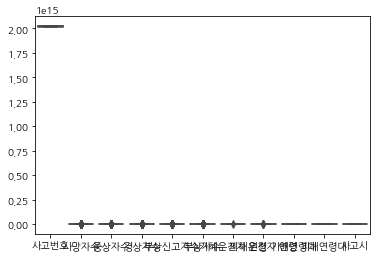

In [33]:
bplot= sns.boxplot(data=df)

In [34]:
def get_outlier(df=None, column=None, weight=1.5):
    # target 값과 상관관계가 높은 열을 우선적으로 진행
    q25 = np.percentile(df[column].values, 25)
    q75 = np.percentile(df[column].values, 75)

    IQR = q75 - q25
    IQR_weight = IQR*weight

    lowest = q25 - IQR_weight
    highest = q75 + IQR_weight

    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    
    return outlier_idx

In [35]:
column_name =  ['사고번호', '사고시간','요일','도로종류','사고내용', '사망자수','부상자수',
                '사고유형','법규위반','노면상태','기상상태', '도로형태',
                '가해운전자 차종','가해운전자 성별','가해운전자 연령','가해운전자 상해정도',
                '피해운전자 차종','피해운전자 성별','피해운전자 연령','피해운전자 상해정도']               
print(df.head())

               사고번호             사고일시   요일 도로종류   시군구  사고내용  사망자수  중상자수  경상자수  \
0  2019010100100152  2019년 1월 1일 11시  화요일   경부  경상북도  경상사고     0     0     1   
1  2019010300100238  2019년 1월 3일 13시  목요일   경부  충청남도  경상사고     0     0     2   
2  2019010400100022  2019년 1월 4일 00시  금요일   경부   경기도  경상사고     0     0     2   
3  2019010500100058  2019년 1월 5일 02시  토요일   경부   경기도  중상사고     0     1     0   
4  2019010500100059  2019년 1월 5일 02시  토요일   경부   경기도  경상사고     0     0     1   

   부상신고자수  ...  가해운전자 연령 가해운전자 상해정도 피해운전자 차종 피해운전자 성별 피해운전자 연령 피해운전자 상해정도  \
0       0  ...        38       상해없음       승용        남       31         경상   
1       0  ...        47       기타불명       승용        남       62         경상   
2       0  ...        55       상해없음       승용        남       30         경상   
3       0  ...        29       상해없음       승용        여       54         중상   
4       0  ...        56       상해없음       승용        남       29         경상   

  가해연령대 피해연령대        사고일 사고시  
0  30.0  30.0 2019-01-01 

In [36]:
from collections import Counter as cc
cnt = cc(df['도로종류'])
cnt.most_common()[:100]

[('경부', 2304),
 ('서울외곽순환', 1478),
 ('영동', 935),
 ('서해안', 845),
 ('중부', 600),
 ('경인', 566),
 ('수도권제1순환', 561),
 ('중앙', 495),
 ('중부내륙', 494),
 ('남해', 428),
 ('서울양양', 394),
 ('호남', 388),
 ('당진영덕', 203),
 ('천안논산', 174),
 ('평택제천국도', 166),
 ('수도권제2순환', 156),
 ('동해', 142),
 ('구리포천', 131),
 ('통영대전', 113),
 ('용인서울', 105),
 ('평택제천', 101),
 ('평택시흥국도', 94),
 ('중부내륙지선', 93),
 ('광주원주', 90),
 ('호남지선', 81),
 ('인천국제공항', 81),
 ('상주영천', 80),
 ('새만금포항', 80),
 ('광주대구', 70),
 ('수원광명', 70),
 ('남해2고속도로', 67),
 ('평택시흥', 66),
 ('중앙지선', 64),
 ('중부내륙고속도로지선', 59),
 ('부산외곽순환', 58),
 ('평택화성간', 58),
 ('순천완주', 54),
 ('논산천안', 50),
 ('무안광주', 46),
 ('남해제2지선', 43),
 ('대전남부순환', 23),
 ('서천공주', 23),
 ('고창담양', 22),
 ('평택화성', 22),
 ('울산', 20),
 ('남해제1지선', 18),
 ('오산화성', 13),
 ('남해지선', 11),
 ('서울문산', 9),
 ('서울외곽(램프)', 7),
 ('세종포천', 6),
 ('울산포항', 6),
 ('익산포항', 5),
 ('옥산오창', 5),
 ('남해제3지선', 4),
 ('남해3고속도로', 3),
 ('남해진입로', 1),
 ('서해안진입로', 1),
 ('함양울산', 1)]

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '피해차종')

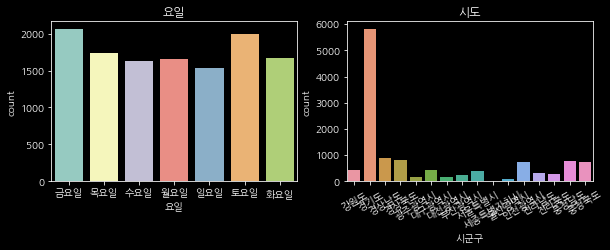

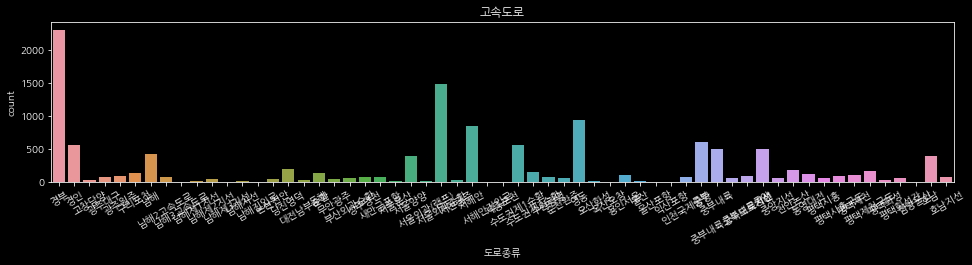

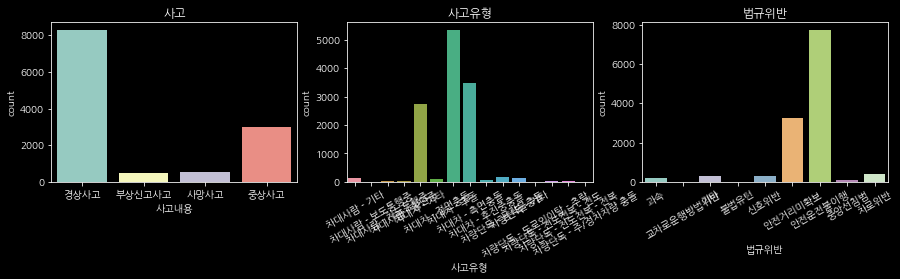

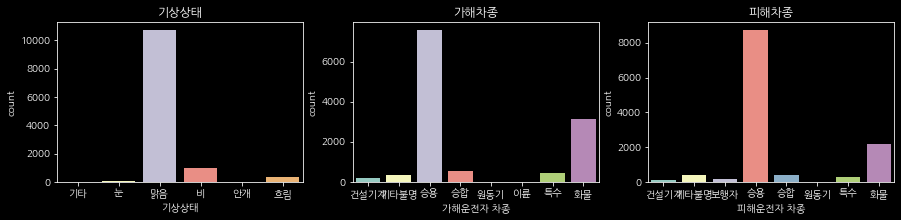

In [77]:
plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
sns.countplot(df['요일'])
plt.title('요일')
plt.subplot(3,3,2)
sns.countplot(df['시군구'])
plt.xticks(rotation=30)
plt.title('시도')
plt.figure(figsize=(55,10))
plt.subplot(3,3,3)
sns.countplot(df['도로종류'])
plt.xticks(rotation=30)
plt.title('고속도로')

plt.figure(figsize=(15,10))
plt.subplot(3,3,4)
sns.countplot(df['사고내용'])
plt.title('사고')
plt.subplot(3,3,5)
sns.countplot(df['사고유형'])
plt.xticks(rotation=30)
plt.title('사고유형')
plt.subplot(3,3,6)
sns.countplot(df['법규위반'])
plt.xticks(rotation=30)
plt.title('법규위반')

plt.figure(figsize=(15,10))
plt.subplot(3,3,7)
sns.countplot(df['기상상태'])
plt.title('기상상태')
plt.subplot(3,3,8)
sns.countplot(df['가해운전자 차종'])
plt.title('가해차종')
plt.subplot(3,3,9)
sns.countplot(df['피해운전자 차종'])
plt.title('피해차종')

Text(0.5, 1.0, '피해운전자 상해정도')

<Figure size 360x360 with 0 Axes>

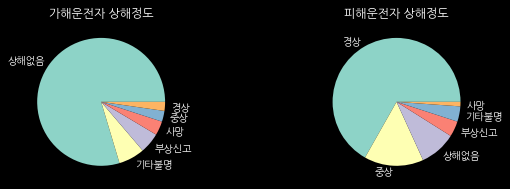

In [80]:
plt.figure(figsize=(5,5))

# wedges, texts = plt.pie(df['가해운전자 상해정도'].value_counts(),    
#                                   labels = df['가해운전자 상해정도'].unique(), 
#                                   shadow = True,
#                                   textprops = dict(color ="magenta")) 

plt.figure(figsize=(15,10))
plt.subplot(3,3,1)
plt.pie(df['가해운전자 상해정도'].value_counts(),labels=df['가해운전자 상해정도'].unique())
plt.title('가해운전자 상해정도')
plt.subplot(3,3,2)
plt.pie(df['피해운전자 상해정도'].value_counts(),labels=df['피해운전자 상해정도'].unique())
plt.title('피해운전자 상해정도')

Text(0.5, 1.0, '가해연령대')

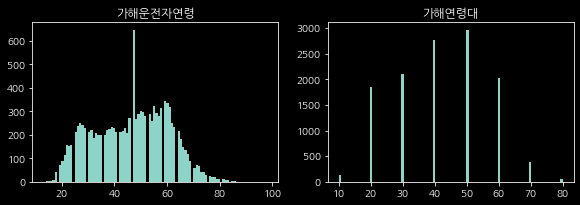

In [82]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
plt.hist(df['가해운전자 연령'],bins=100)
plt.title('가해운전자연령')
plt.subplot(3,3,2)
plt.hist(df['가해연령대'],bins=100)
plt.title('가해연령대')

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '7'),
  Text(5, 0, '5')])

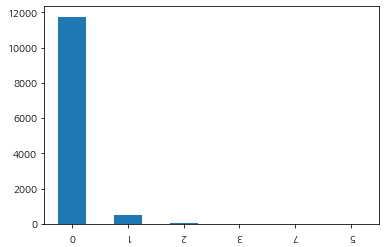

In [43]:
# 종속변수 y 
df['사망자수'].value_counts().plot.bar()
plt.xticks(rotation=180)
# : 불균형이 상당히 심한 불균형 데이터 
## 1) 평가지표를 f1 score를 사용
## 2) 머신러닝 불균형 해소 방법인 SMOTE 이용

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='피해운전자 연령', ylabel='Density'>

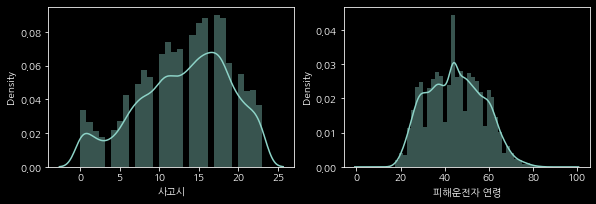

In [83]:
plt.figure(figsize = (15,10))
plt.subplot(3,3,1)
sns.distplot(df['사고시'])
plt.subplot(3,3,2)
sns.distplot(df['피해운전자 연령'])

# sns.distplot(df['사고시'])

In [47]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['사고일시', '요일', '도로종류', '시군구', '사고내용', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 상해정도']
numeric_list : ['사고번호', '사망자수', '중상자수', '경상자수', '부상신고자수', '부상자수', '가해운전자 연령', '피해운전자 연령', '가해연령대', '피해연령대', '사고일', '사고시']


<AxesSubplot:xlabel='요일', ylabel='사망자수'>

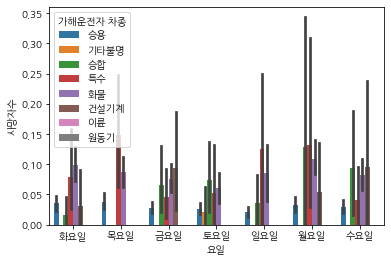

In [48]:
# 요일 + 차종 별 사망자 수 분포
sns.barplot(x='요일', y='사망자수', hue='가해운전자 차종', data=df)

In [49]:
# ▶ 사용하지 않을 Categorical 변수는 리스트에서 제외
df2 = df.drop( ['사고번호', '사고내용', '중상자수', '경상자수', '부상신고자수', '노면상태', '도로형태',  '가해운전자 성별', 
                '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 연령', '피해운전자 상해정도', '피해연령대', '사고일',
               ], axis='columns')
df2

,사고일시,요일,도로종류,시군구,사망자수,부상자수,사고유형,법규위반,기상상태,가해운전자 차종,가해운전자 연령,가해연령대,사고시
0,2019년 1월 1일 11시,화요일,경부,경상북도,0,1,차대차 - 기타,안전운전불이행,맑음,승용,38,30.0,11
1,2019년 1월 3일 13시,목요일,경부,충청남도,0,2,차대차 - 기타,안전운전불이행,맑음,기타불명,47,40.0,13
2,2019년 1월 4일 00시,금요일,경부,경기도,0,2,차대차 - 기타,신호위반,맑음,승용,55,50.0,0
3,2019년 1월 5일 02시,토요일,경부,경기도,0,1,차대차 - 추돌,안전운전불이행,맑음,승용,29,20.0,2
4,2019년 1월 5일 02시,토요일,경부,경기도,0,1,차대차 - 측면충돌,안전운전불이행,맑음,승용,56,50.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,2019년 12월 31일 19시,화요일,수도권제1순환,경기도,0,1,차대차 - 기타,안전운전불이행,맑음,승용,65,60.0,19
12279,2019년 12월 31일 19시,화요일,수도권제1순환,경기도,0,1,차대차 - 기타,안전운전불이행,맑음,승용,65,60.0,19
12280,2021년 5월 15일 15시,토요일,수도권제1순환,서울특별시,0,1,차대차 - 측면충돌,신호위반,맑음,승용,65,60.0,15
12281,2021년 6월 12일 19시,토요일,수도권제1순환,서울특별시,0,1,차대차 - 측면충돌,안전거리미확보,맑음,승용,20,20.0,19


(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0.5, 0, '사망자수'),
  Text(1.5, 0, '부상자수'),
  Text(2.5, 0, '가해운전자 연령'),
  Text(3.5, 0, '가해연령대'),
  Text(4.5, 0, '사고시')])

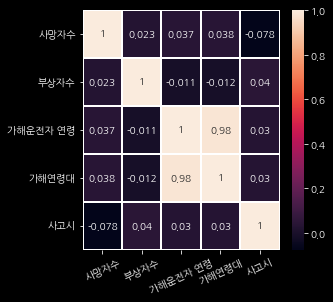

In [97]:
plt.subplots(figsize=(15,15))
plt.subplot(3,3,1)
sns.heatmap(df2.corr(method='pearson'), annot=True, linewidths=2)
plt.xticks(rotation=25)
# print(df.corr(method='pearson'))

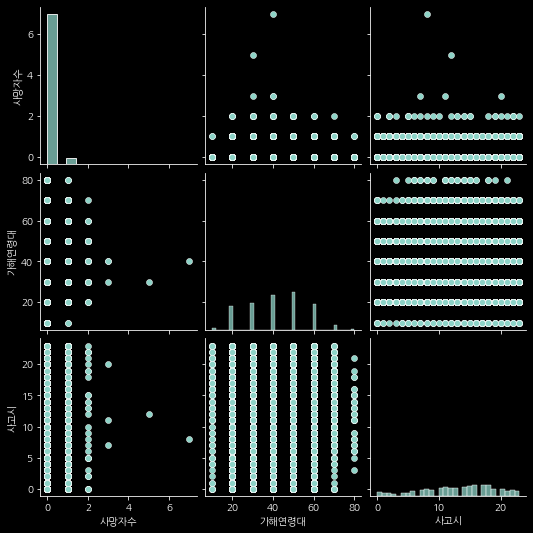

In [99]:
# ▶ 모든 변수 조합에 관한 Scatter plot
df_pair = df[['사망자수','가해연령대', '사고시']]
# plt.style.use(['dark_background'])
sns.pairplot(df_pair)
plt.show()

<AxesSubplot:xlabel='가해연령대', ylabel='사망자수'>

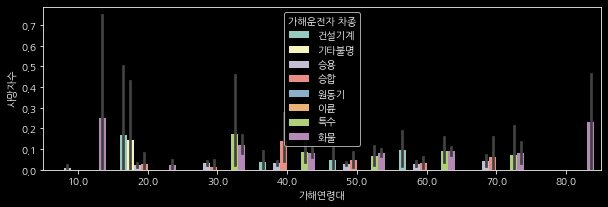

In [105]:
plt.subplots(figsize=(10,3))
sns.barplot(x='가해연령대', y='사망자수', hue='가해운전자 차종', data=df)

<AxesSubplot:xlabel='기상상태', ylabel='사망자수'>

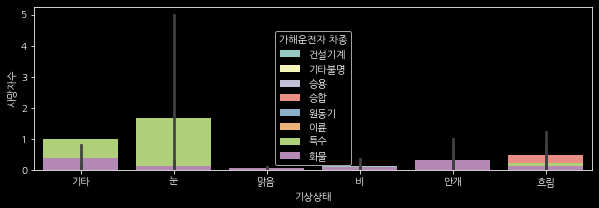

In [106]:
plt.subplots(figsize=(10,3))
sns.barplot(x='기상상태', y='사망자수', hue='가해운전자 차종', data=df, dodge=False)

In [54]:
# ▶ numeric, categorical value 나누기
numeric_list=[]
categoical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categoical_list.append(i)
  else :
    numeric_list.append(i)

print("categoical_list :", categoical_list)
print("numeric_list :", numeric_list)

categoical_list : ['사고일시', '요일', '도로종류', '시군구', '사고내용', '사고유형', '법규위반', '노면상태', '기상상태', '도로형태', '가해운전자 차종', '가해운전자 성별', '가해운전자 상해정도', '피해운전자 차종', '피해운전자 성별', '피해운전자 상해정도']
numeric_list : ['사고번호', '사망자수', '중상자수', '경상자수', '부상신고자수', '부상자수', '가해운전자 연령', '피해운전자 연령', '가해연령대', '피해연령대', '사고일', '사고시']


In [55]:
# ▶ 사용하지 않을 Categorical 변수는 리스트에서 제외
categoical_list.remove('사고일시')
# categoical_list.remove('노면상태')
# categoical_list.remove('도로형태')
categoical_list
# # ▶ 새로 추가한 변수는 없기 때문에 추가
# categoical_list.append('month')
# categoical_list

In [58]:
# ▶ 위에서 정의한 것처럼 (사망자수) X (중상자수) X (경상자수) X (부상신고자수) = 최종 충돌 에너지로 정의, Col을 생성
# ▶ 2020년 도로교통사고비용의추계와평가[2021년판] <표 5-4> 사상자 피해종별 평균비용(순평균비용+사회기관비용) 
# 총평균비용 :  당사자들의 직접손실을 위주로만 계산했을 때의 평균비용
# 사회기관비용 : 교통경찰비용, 자동차보험회사비용, 구조․구급비용

df['교통사고비용'] = (df['사망자수']*485385.6) + (df['중상자수']* 66502.4) + (df['경상자수']*5245.0) + (df['부상신고자수']* 2582.7)
df.head(5)

,사고번호,사고일시,요일,도로종류,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,가해연령대,피해연령대,사고일,사고시,교통사고비용
0,2019010100100152,2019년 1월 1일 11시,화요일,경부,경상북도,경상사고,0,0,1,0,...,상해없음,승용,남,31,경상,30.0,30.0,2019-01-01,11,5245.0
1,2019010300100238,2019년 1월 3일 13시,목요일,경부,충청남도,경상사고,0,0,2,0,...,기타불명,승용,남,62,경상,40.0,60.0,2019-01-03,13,10490.0
2,2019010400100022,2019년 1월 4일 00시,금요일,경부,경기도,경상사고,0,0,2,0,...,상해없음,승용,남,30,경상,50.0,20.0,2019-01-04,0,10490.0
3,2019010500100058,2019년 1월 5일 02시,토요일,경부,경기도,중상사고,0,1,0,0,...,상해없음,승용,여,54,중상,20.0,50.0,2019-01-05,2,66502.4
4,2019010500100059,2019년 1월 5일 02시,토요일,경부,경기도,경상사고,0,0,1,0,...,상해없음,승용,남,29,경상,50.0,20.0,2019-01-05,2,5245.0


교통사고비용 평균 : 55866.01608727369


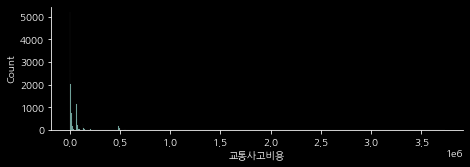

In [111]:
# ▶ 이상(abnormal)을 정의하기 위해 고속도로 사고율 분포를 확인
# ▶ 대다수의 충돌에너지 data가 충돌에너지의 평균인 어느선에 분포하는지 확인 필요
# 2019-2021기준 216%
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df['교통사고비용']);
plt.gcf().set_size_inches(7, 2)                        
print("교통사고비용 평균 :", df['교통사고비용'].mean())

사망자수 평균 : 0.04681266791500448


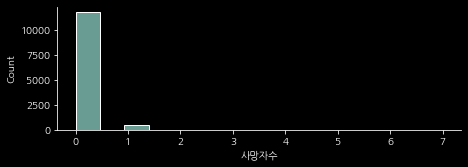

In [112]:
# 2019-2021기준 사망자율 4%
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use(['dark_background'])

sns.displot(df['사망자수']);
plt.gcf().set_size_inches(7, 2)
print("사망자수 평균 :", df['사망자수'].mean())

In [61]:
# ▶ 이상을 정의하는 방법은 다양하고, 보통 현업에 기준이 존재할 확률이 큼
# ▶ 현업의 기준이 존재하지 않는다면, 보통 data의 평균에서 ±1, ±2, ±3 sd(표준편차) 떨어진 Data들을 이상으로 가정하는 경우가 많음
# ▶ mean + 2sd 이상인 충돌 에너지를 이상으로 정의
# ▶ 사고위험발생 정의
import numpy as np
df['대형교통사고비용'] =  np.where(df['교통사고비용'] > df['교통사고비용'].mean() + 2*df['교통사고비용'].std(), 1, 0)
df.head(5)

,사고번호,사고일시,요일,도로종류,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,가해연령대,피해연령대,사고일,사고시,교통사고비용,대형교통사고비용
0,2019010100100152,2019년 1월 1일 11시,화요일,경부,경상북도,경상사고,0,0,1,0,...,승용,남,31,경상,30.0,30.0,2019-01-01,11,5245.0,0
1,2019010300100238,2019년 1월 3일 13시,목요일,경부,충청남도,경상사고,0,0,2,0,...,승용,남,62,경상,40.0,60.0,2019-01-03,13,10490.0,0
2,2019010400100022,2019년 1월 4일 00시,금요일,경부,경기도,경상사고,0,0,2,0,...,승용,남,30,경상,50.0,20.0,2019-01-04,0,10490.0,0
3,2019010500100058,2019년 1월 5일 02시,토요일,경부,경기도,중상사고,0,1,0,0,...,승용,여,54,중상,20.0,50.0,2019-01-05,2,66502.4,0
4,2019010500100059,2019년 1월 5일 02시,토요일,경부,경기도,경상사고,0,0,1,0,...,승용,남,29,경상,50.0,20.0,2019-01-05,2,5245.0,0


In [62]:
# ▶ 고속도로 사망률 확인 정의
import numpy as np
df['사망사고위험도'] =  np.where(df['사망자수'] > df['사망자수'].mean() + 2*df['사망자수'].std(), 1, 0)
df.head(5)

,사고번호,사고일시,요일,도로종류,시군구,사고내용,사망자수,중상자수,경상자수,부상신고자수,...,피해운전자 성별,피해운전자 연령,피해운전자 상해정도,가해연령대,피해연령대,사고일,사고시,교통사고비용,대형교통사고비용,사망사고위험도
0,2019010100100152,2019년 1월 1일 11시,화요일,경부,경상북도,경상사고,0,0,1,0,...,남,31,경상,30.0,30.0,2019-01-01,11,5245.0,0,0
1,2019010300100238,2019년 1월 3일 13시,목요일,경부,충청남도,경상사고,0,0,2,0,...,남,62,경상,40.0,60.0,2019-01-03,13,10490.0,0,0
2,2019010400100022,2019년 1월 4일 00시,금요일,경부,경기도,경상사고,0,0,2,0,...,남,30,경상,50.0,20.0,2019-01-04,0,10490.0,0,0
3,2019010500100058,2019년 1월 5일 02시,토요일,경부,경기도,중상사고,0,1,0,0,...,여,54,중상,20.0,50.0,2019-01-05,2,66502.4,0,0
4,2019010500100059,2019년 1월 5일 02시,토요일,경부,경기도,경상사고,0,0,1,0,...,남,29,경상,50.0,20.0,2019-01-05,2,5245.0,0,0


In [63]:
# ▶ 이상(abnormal) data 분포 확인
# ▶ 약 3.2%가 대형사고위험도를 보이고 있음
(560/11723)*100
df['대형교통사고비용'].value_counts()

0    11723
1      560
Name: 대형교통사고비용, dtype: int64

In [64]:
# ▶ 약 4.4%가 사망사고위험도를 보이고 있음
(525/11758)*100
df['사망사고위험도'].value_counts()

0    11758
1      525
Name: 사망사고위험도, dtype: int64

# 이상(abnormal) 발생 시점 분석
이상(abnormal)을 정의했다면, 이상(abnormal) 시점의 환경변수 분포
이상(1) 상태와 이상이 아닌(0)의 상태를 비교

In [65]:
# ▶ 이상(abnormal)에 Sensor data 분석
# ▶ 이상(abnormal)과 정상(normal)일 때, 센서 값의 평균 값이 다른 것을 확인
print("대형교통사고비용 :",df[df ['대형교통사고비용']==1]['가해운전자 연령'].mean(), "/ normal : ",df[df['대형교통사고비용']==0]['가해운전자 연령'].mean())

대형교통사고비용 : 49.50714285714286 / normal :  46.23722596604964


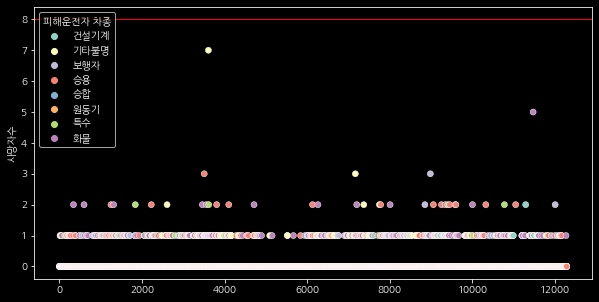

In [118]:
# ▶ 더 정확한 분포를 확인하기 위해 Scatter plot을 그림

fig, axes = plt.subplots(1, 1)
sns.scatterplot(x=df.index, y=df['사망자수'], hue = df['피해운전자 차종']);
plt.axhline(y=8, color='r', linewidth=1)
plt.gcf().set_size_inches(10, 5)

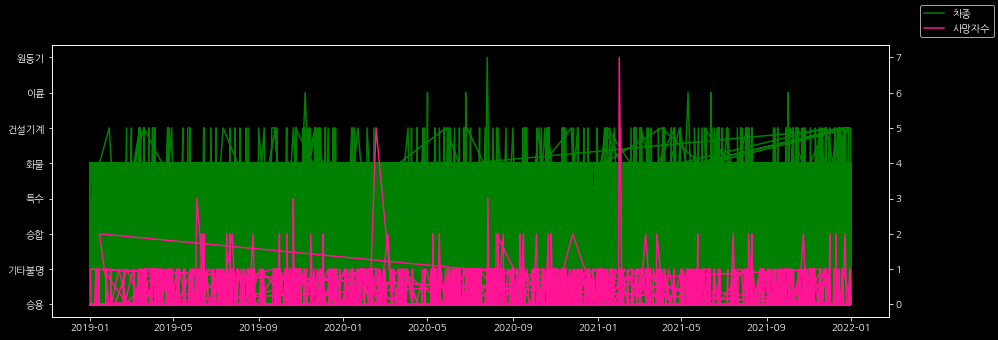

In [125]:
# ▶ 차종별 사망자수 비교
# ▶
fig, ax1 = plt.subplots()
ax1.plot(df['사고일'], df['가해운전자 차종'], color='green', label='차종')
ax2 = ax1.twinx()
ax2.plot(df['사고일'], df['사망자수'], color='deeppink', label='사망자수')

fig.legend()
plt.gcf().set_size_inches(15, 5)
plt.show()

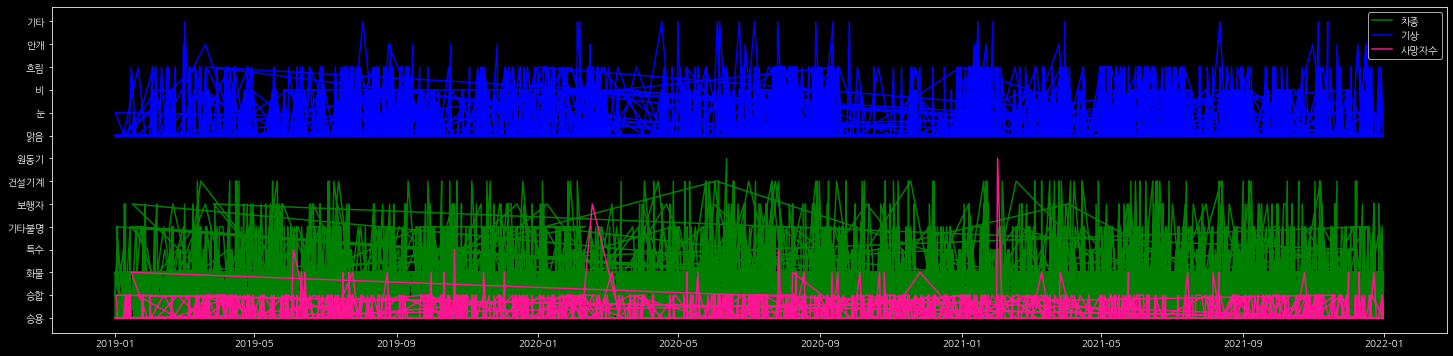

In [122]:
# ▶ 사망자수, 차종, 기상상태 상관관계
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])
plt.plot(df['사고일'], df['피해운전자 차종'], color='green', label='차종')
plt.plot(df['사고일'], df['기상상태'], color='blue', label='기상')
plt.plot(df['사고일'], df['사망자수'], color='deeppink', label='사망자수')
plt.legend()
plt.gcf().set_size_inches(25, 6)

In [70]:
df['가해운전자 성별'].replace(['남','여', '기타불명'],[0,1,2],inplace=True)
df['피해운전자 성별'].replace(['남','여', '기타불명'],[0,1,2],inplace=True)

In [71]:
#전처리 편리하도록 TYPE변경
df['요일'] = df['요일'].astype('category')
df['도로종류'] = df['도로종류'].astype('category')
df['시군구'] = df['시군구'].astype('category')
df['사고내용'] = df['사고내용'].astype('category')
df['사고유형'] = df['사고유형'].astype('category')
df['법규위반'] = df['법규위반'].astype('category')
df['노면상태'] = df['노면상태'].astype('category')
df['기상상태'] = df['기상상태'].astype('category')
df['도로형태'] = df['도로형태'].astype('category')
df['가해운전자 차종'] = df['가해운전자 차종'].astype('category')
df['가해운전자 상해정도'] = df['가해운전자 상해정도'].astype('category')
df['피해운전자 차종'] = df['피해운전자 차종'].astype('category')
df['피해운전자 상해정도'] = df['피해운전자 상해정도'].astype('category')

In [72]:
label_columns = ['요일','도로종류','사고내용','사고유형','법규위반','기상상태',
                '가해운전자 차종','가해운전자 성별','가해운전자 연령','가해운전자 상해정도',
                '피해운전자 차종','피해운전자 성별','피해운전자 연령','피해운전자 상해정도']      
# 명목척도, 서열척도 연산불가 가변수화, parch(동승자), 더미화
label_df = df[label_columns]
label_df = pd.get_dummies(label_df, columns=label_columns)
label_df.info()
label_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Columns: 280 entries, 요일_금요일 to 피해운전자 상해정도_중상
dtypes: uint8(280)
memory usage: 3.3 MB


,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,요일_화요일,도로종류_경부,도로종류_경인,도로종류_고창담양,...,피해운전자 연령_82,피해운전자 연령_83,피해운전자 연령_84,피해운전자 연령_95,피해운전자 상해정도_경상,피해운전자 상해정도_기타불명,피해운전자 상해정도_부상신고,피해운전자 상해정도_사망,피해운전자 상해정도_상해없음,피해운전자 상해정도_중상
0,0,0,0,0,0,0,1,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [73]:
df['사망자수'].value_counts()

0    11758
1      486
2       34
3        3
7        1
5        1
Name: 사망자수, dtype: int64

In [74]:
# ▶ >0 사망 1, <=0 사망자 없음 0
import numpy as np
df['사망유무'] = np.where(df['사망자수'] == 0, 0, 1)
df['사망유무'].value_counts()

0    11758
1      525
Name: 사망유무, dtype: int64

In [126]:
# # 가변수 마지막열 제거
label_df.drop(['요일_화요일'], inplace=True, axis=1)
label_df

,요일_금요일,요일_목요일,요일_수요일,요일_월요일,요일_일요일,요일_토요일,도로종류_경부,도로종류_경인,도로종류_고창담양,도로종류_광주대구,...,피해운전자 연령_82,피해운전자 연령_83,피해운전자 연령_84,피해운전자 연령_95,피해운전자 상해정도_경상,피해운전자 상해정도_기타불명,피해운전자 상해정도_부상신고,피해운전자 상해정도_사망,피해운전자 상해정도_상해없음,피해운전자 상해정도_중상
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12279,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12280,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12281,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [127]:
preprocessed_df = pd.concat([label_df, df[['사고일시','사망자수','부상자수','가해연령대']]], ignore_index=True, axis=1)
preprocessed_df.head()
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12283 entries, 0 to 12282
Columns: 283 entries, 0 to 282
dtypes: float64(1), int64(2), object(1), uint8(279)
memory usage: 3.6+ MB


In [128]:
print(preprocessed_df.describe().T)     

       count       mean        std   min   25%   50%   75%   max
0    12283.0   0.167874   0.373770   0.0   0.0   0.0   0.0   1.0
1    12283.0   0.141008   0.348044   0.0   0.0   0.0   0.0   1.0
2    12283.0   0.132622   0.339180   0.0   0.0   0.0   0.0   1.0
3    12283.0   0.134413   0.341110   0.0   0.0   0.0   0.0   1.0
4    12283.0   0.125458   0.331251   0.0   0.0   0.0   0.0   1.0
..       ...        ...        ...   ...   ...   ...   ...   ...
277  12283.0   0.092567   0.289836   0.0   0.0   0.0   0.0   1.0
278  12283.0   0.150045   0.357130   0.0   0.0   0.0   0.0   1.0
280  12283.0   0.046813   0.238065   0.0   0.0   0.0   0.0   7.0
281  12283.0   2.114630   2.121888   0.0   1.0   1.0   2.0  48.0
282  12283.0  41.789465  14.433524  10.0  30.0  40.0  50.0  80.0

[282 rows x 8 columns]


In [139]:
column_name =  ['사고번호', '사고시간','요일','도로종류','사고내용', '사망자수','부상자수',
                '사고유형','법규위반','노면상태','기상상태', '도로형태',
                '가해운전자 차종','가해운전자 성별','가해운전자 연령','가해운전자 상해정도',
                '피해운전자 차종','피해운전자 성별','피해운전자 연령','피해운전자 상해정도']               
print(df.head())

               사고번호             사고일시   요일 도로종류   시군구  사고내용  사망자수  중상자수  경상자수  \
0  2019010100100152  2019년 1월 1일 11시  화요일   경부  경상북도  경상사고     0     0     1   
1  2019010300100238  2019년 1월 3일 13시  목요일   경부  충청남도  경상사고     0     0     2   
2  2019010400100022  2019년 1월 4일 00시  금요일   경부   경기도  경상사고     0     0     2   
3  2019010500100058  2019년 1월 5일 02시  토요일   경부   경기도  중상사고     0     1     0   
4  2019010500100059  2019년 1월 5일 02시  토요일   경부   경기도  경상사고     0     0     1   

   부상신고자수  ...  피해운전자 연령 피해운전자 상해정도 가해연령대 피해연령대        사고일 사고시   교통사고비용  \
0       0  ...        31         경상  30.0  30.0 2019-01-01  11   5245.0   
1       0  ...        62         경상  40.0  60.0 2019-01-03  13  10490.0   
2       0  ...        30         경상  50.0  20.0 2019-01-04   0  10490.0   
3       0  ...        54         중상  20.0  50.0 2019-01-05   2  66502.4   
4       0  ...        29         경상  50.0  20.0 2019-01-05   2   5245.0   

   대형교통사고비용  사망사고위험도 사망유무  
0         0        0    0  
1         0 

In [133]:
# #중복제거
# # DataFrame 중복 row 제거
# df.duplicated() # 중복 여부 boolean 형태로 반환
# df.drop_duplicates() # 행 내용이 동일한 경우 제거
# df.drop_duplicates(['col1'], keep='last') # col1기준 중복값중 마지막만 남겨둠

In [ ]:
df.to_excel('./df_test.xlsx')